### Simple Linear Regression Model

Salary_hike -> Build a prediction model for Salary_hike

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#Loading the dataset
df=pd.read_csv('Salary_Data (1).csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

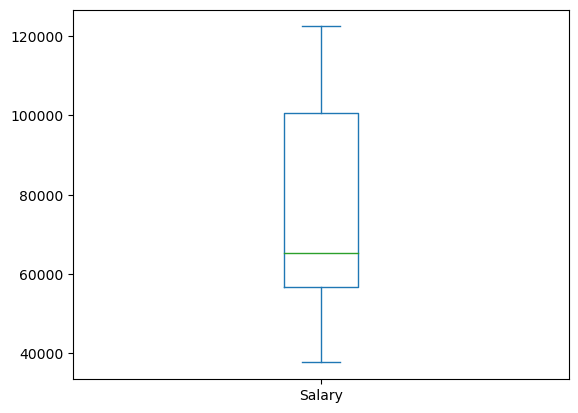

In [8]:
df.iloc[:,1].plot(kind='box')

<Axes: >

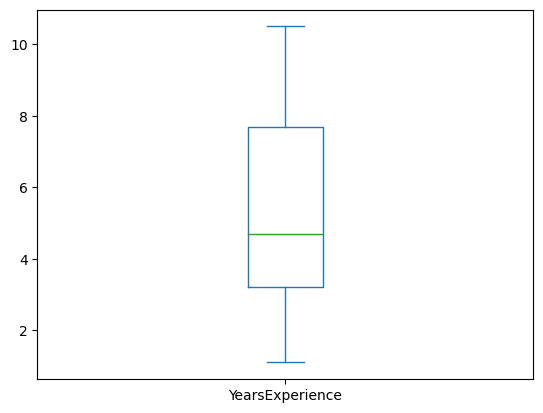

In [9]:
df.iloc[:,0].plot(kind='box')

In [10]:
#Finding out the correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_24824\446906847.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

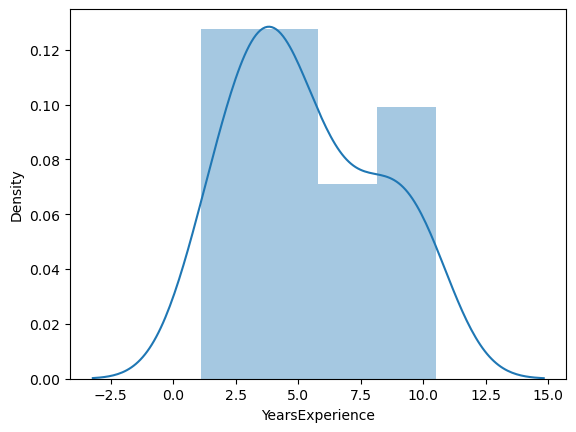

In [12]:
import seaborn as sns
sns.distplot(df['YearsExperience'])

C:\Users\hp\AppData\Local\Temp\ipykernel_24824\3955355517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

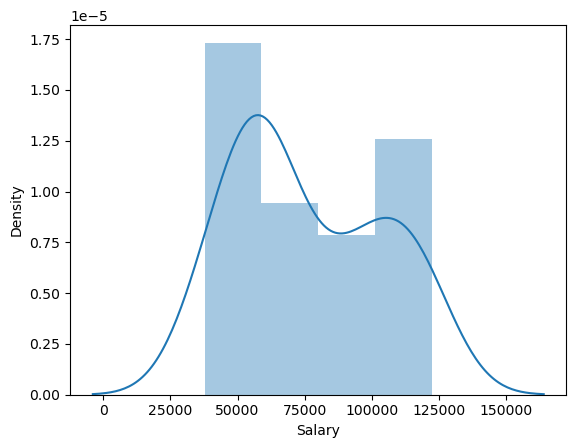

In [13]:
import seaborn as sns
sns.distplot(df['Salary'])

In [14]:
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


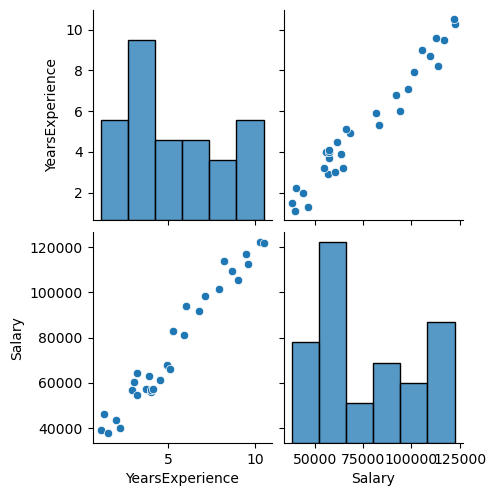

In [15]:
sns.pairplot(df)

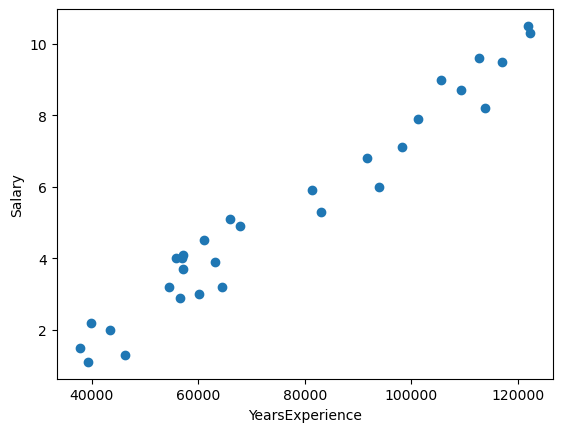

In [16]:
plt.scatter(df.iloc[:,1],df.iloc[:,0])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

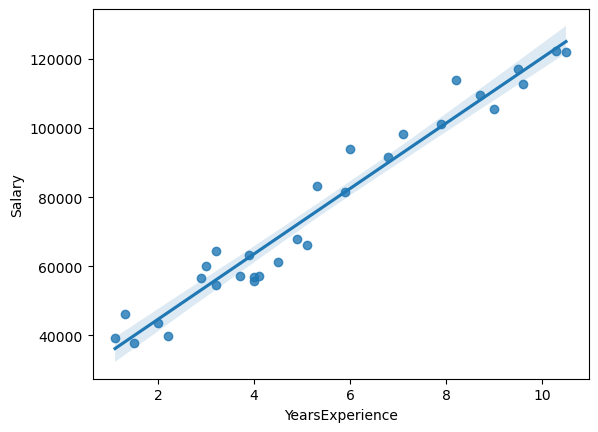

In [17]:
#plotting regression plot
sns.regplot(x="YearsExperience", y="Salary", data=df);

In [18]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("Salary ~ YearsExperience ", data=df).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        20:26:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [26]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

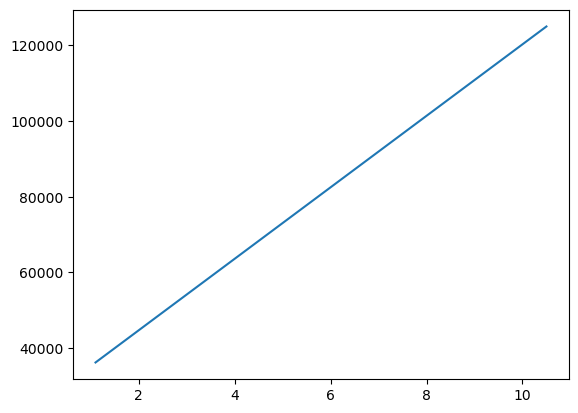

In [29]:
plt.plot(df.YearsExperience, model.fittedvalues)

In [30]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [31]:
#Prediction of new Data Point

In [33]:
New_Data=pd.Series([45,23])


In [35]:
data_pred=pd.DataFrame(New_Data,columns=['YearsExperience'])

In [36]:
model.predict(data_pred)

0    451040.504664
1    243141.333592
dtype: float64